#Import Libraries

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import numpy as np
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Initial visualisation for feature selection


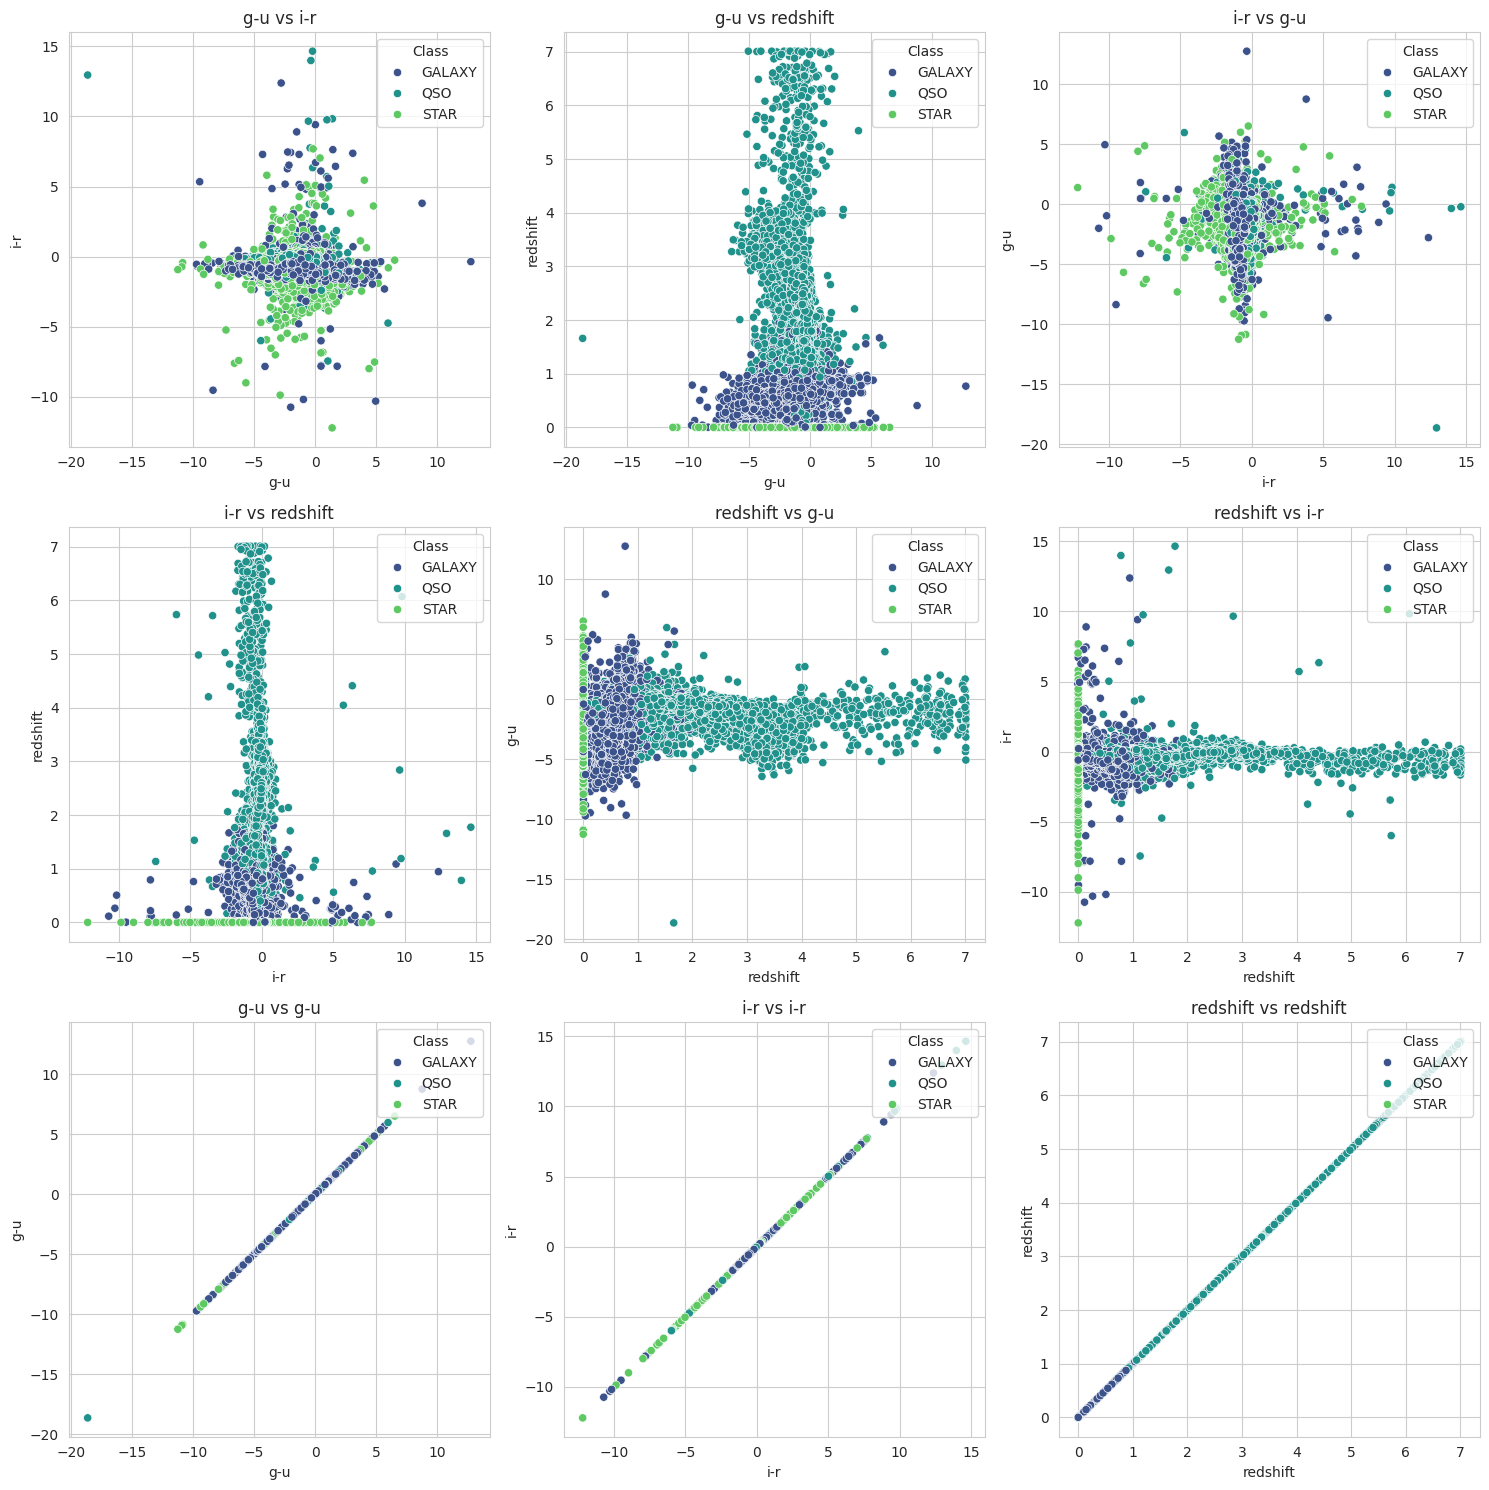

In [ ]:
# Adjust the path based on where you've stored the file in your Google Drive
file_path = '/content/drive/My Drive/BS/stellar/star_classification.csv'
data = pd.read_csv(file_path)

# Calculate g-u and i-r
data['g-u'] = data['g'] - data['u']
data['i-r'] = data['i'] - data['r']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of combinations to plot, updated to reflect new calculations and pairs
combinations = [('g-u', 'i-r'), ('g-u', 'redshift'), ('i-r', 'g-u'),
                ('i-r', 'redshift'), ('redshift', 'g-u'), ('redshift', 'i-r'),
                ('g-u', 'g-u'), ('i-r', 'i-r'), ('redshift', 'redshift')]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, (x, y) in enumerate(combinations):
    sns.scatterplot(ax=axes[i], x=data[x], y=data[y], hue=data['class'], palette='viridis')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y}')
    axes[i].legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()


#kNN model for prediction

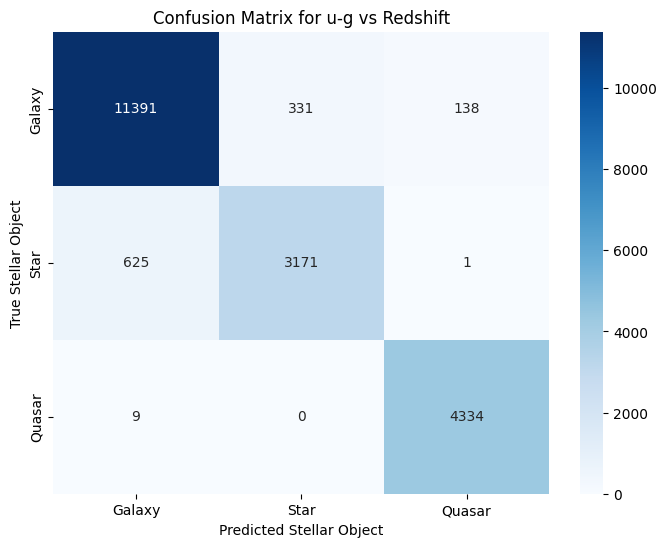

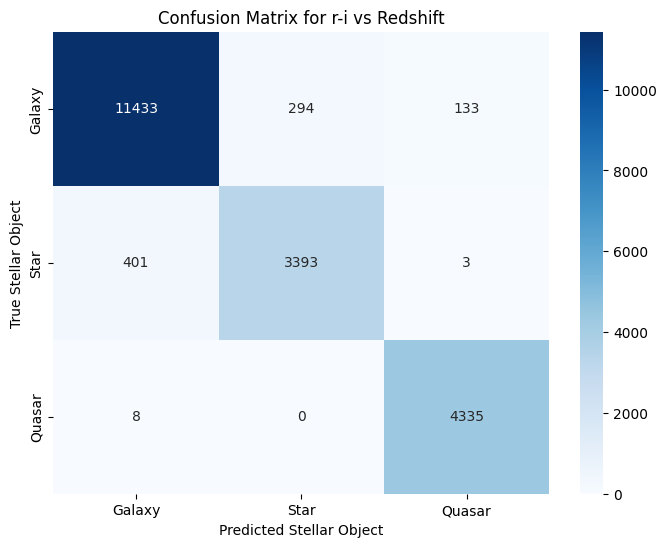

Accuracy using u-g against redshift: 0.944800
Accuracy using r-i against redshift: 0.958050


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/BS/stellar/star_classification.csv')

# Create color index features and redshift
df['u_g'] = df['u'] - df['g']
df['r_i'] = df['r'] - df['i']

# Define features and target
X_ug = df[['u_g', 'redshift']]
X_ri = df[['r_i', 'redshift']]
y = df['class']

# Split the dataset into training and testing sets
X_train_ug, X_test_ug, y_train_ug, y_test_ug = train_test_split(X_ug, y, test_size=0.2, random_state=42)
X_train_ri, X_test_ri, y_train_ri, y_test_ri = train_test_split(X_ri, y, test_size=0.2, random_state=42)

# Initialize and train the kNN classifier for u-g vs redshift
knn_ug = KNeighborsClassifier(n_neighbors=5)
knn_ug.fit(X_train_ug, y_train_ug)

# Predict and evaluate for u-g vs redshift
y_pred_ug = knn_ug.predict(X_test_ug)
accuracy_ug = accuracy_score(y_test_ug, y_pred_ug)
cm_ug = confusion_matrix(y_test_ug, y_pred_ug)

# Initialize and train the kNN classifier for r-i vs redshift
knn_ri = KNeighborsClassifier(n_neighbors=5)
knn_ri.fit(X_train_ri, y_train_ri)

# Predict and evaluate for r-i vs redshift
y_pred_ri = knn_ri.predict(X_test_ri)
accuracy_ri = accuracy_score(y_test_ri, y_pred_ri)
cm_ri = confusion_matrix(y_test_ri, y_pred_ri)

class_labels = ['Galaxy', 'Star',  'Quasar']

# Display the confusion matrix for u-g vs redshift with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ug, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for u-g vs Redshift')
plt.xlabel('Predicted Stellar Object')
plt.ylabel('True Stellar Object')
plt.show()

# Display the confusion matrix for r-i vs redshift with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ri, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for r-i vs Redshift')
plt.xlabel('Predicted Stellar Object')
plt.ylabel('True Stellar Object')
plt.show()

# Print accuracy for both models
print(f'Accuracy using u-g against redshift: {accuracy_ug:.6f}')
print(f'Accuracy using r-i against redshift: {accuracy_ri:.6f}')


#Manual testing

In [8]:
def predict_class(u, g, r, i, z, redshift, knn_ug, knn_ri):
    # Calculate color indices
    u_g = u - g
    r_i = r - i

    # Prepare the feature arrays for prediction
    features_ug = np.array([[u_g, redshift]])
    features_ri = np.array([[r_i, redshift]])

    # Predict using both models
    pred_ug = knn_ug.predict(features_ug.reshape(1, -1))
    pred_ri = knn_ri.predict(features_ri.reshape(1, -1))

    # Combine predictions
    combined_preds = [pred_ug[0], pred_ri[0]]

    # Find the most common prediction (mode) among combined predictions
    final_class = Counter(combined_preds).most_common(1)[0][0]

    return final_class

u, g, r, i, z, redshift = 22, 20, 19, 18, 17, 0.4  # Example values, kindly rewrite or take input from the user by uncommenting the following:
'''u=float(input("enter u: "))
g=float(input("enter g: "))
r=float(input("enter r: "))
i=float(input("enter i: "))
z=float(input("enter z: "))
redshift=float(input("enter redshift: "))'''
predicted_class = predict_class(u, g, r, i, z, redshift, knn_ug, knn_ri)
print(f'The predicted class is: {predicted_class}')


The predicted class is: GALAXY


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
